In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
trainData = pd.read_csv('/kaggle/input/titanic/train.csv')
testData = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
trainData.describe(include='all')
# PassengerID is jsut Identity number like row ID (passenger ID)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Youseff, Mr. Gerious",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
testData.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Roth, Miss. Sarah A",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [5]:
trainData.info()
# A total of 891 rows and 12 features, with only age,embarked and cabin having missing values or nulls
# 5 Categorical features:Name,Sex,Ticket,Cabin and Embarked
# 4 Discrete Features: SibSp, Parch, Pclass, Survived 
# 3 Continous Numerical Features: Fare,Age,PassengerID 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
testData.info()
#Age, Fare and Cabin Features have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
trainData.isnull().sum()
# for Age 177 and Cabin 687 out of  891 total rows
# One way to solve for age is  we can fill these missing values with mean of total
# another is too remove the data rows with missing values - but if we do so the dataset will shrink in good amount
# so let's try first with mean values for age or dig deep in data to find out better way to fill it up
# for Cabin, missing values represent general class or non-luxury passengers
# for Embarked, two missing value - one way to fix ->data row can be dropped

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

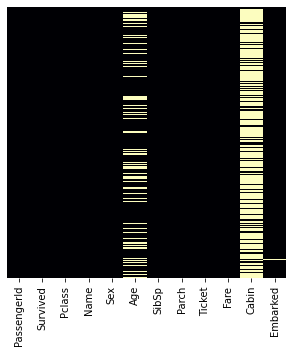

In [13]:
# let's Visualize the data with all the features using heatmap to see null or blank values in features
plt.figure(figsize=(5,5))
sns.heatmap(trainData.isnull(),yticklabels=False,cbar=False,cmap='magma')
# this is classic way to see missing data - if figure size is not given single value miss are sometime not displayed

In [14]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

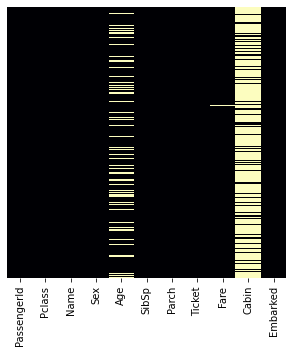

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(testData.isnull(),yticklabels=False,cbar=False,cmap='magma')
#Age, Fare and Cabin Features have missing values

Survived VS Died

In [16]:
trainDataCopy = trainData.copy()
testDataCopy = testData.copy()

In [17]:
# Let's check the count how many survived and how many died
passengerSurvived = trainDataCopy[trainDataCopy['Survived']==1]
passengerDied = trainDataCopy[trainDataCopy['Survived']==0]

# survived vs died proportion in the dataset

print('Total =',len(trainDataCopy))
print('Number of survivals =',len(passengerSurvived))
print('% of survivals by total=',1.*(len(passengerSurvived)/len(trainDataCopy)*100),"%")
print('Number of deaths =',len(passengerDied))
print('% of deaths by total =',1.*(len(passengerDied)/len(trainDataCopy))*100,"%")

#The dataset is imblanaced -> having ~40% survival and ~60% deaths -> Ideally we should have 50% for each
#for training another thing that can be done is -> get the data set balanced
# and also divid the train data further into test and train

Total = 891
Number of survivals = 342
% of survivals by total= 38.38383838383838 %
Number of deaths = 549
% of deaths by total = 61.61616161616161 %


In [18]:
# Let's look into the data sets for survial and death
passengerSurvived.describe(include='all')
# Sex is influencing the survial and death - female passengers are more survived compared to male
# Parch , Fare and Pclass are influencive faetures 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,342.000000,342.0,342.000000,342,342,290.000000,342.000000,342.000000,342,342.000000,136,340
unique,NaN,NaN,NaN,342,2,NaN,NaN,NaN,260,NaN,101,3
top,NaN,NaN,NaN,"Coutts, Master. William Loch ""William""",female,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,233,NaN,NaN,NaN,5,NaN,4,217
mean,444.368421,1.0,1.950292,NaN,NaN,28.343690,0.473684,0.464912,NaN,48.395408,NaN,NaN
std,252.358840,0.0,0.863321,NaN,NaN,14.950952,0.708688,0.771712,NaN,66.596998,NaN,NaN
min,2.000000,1.0,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,250.750000,1.0,1.000000,NaN,NaN,19.000000,0.000000,0.000000,NaN,12.475000,NaN,NaN
50%,439.500000,1.0,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,26.000000,NaN,NaN
75%,651.500000,1.0,3.000000,NaN,NaN,36.000000,1.000000,1.000000,NaN,57.000000,NaN,NaN


In [19]:
passengerDied.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,549.000000,549.0,549.000000,549,549,424.000000,549.000000,549.000000,549,549.000000,68,549
unique,NaN,NaN,NaN,549,2,NaN,NaN,NaN,470,NaN,62,3
top,NaN,NaN,NaN,"Youseff, Mr. Gerious",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,468,NaN,NaN,NaN,7,NaN,2,427
mean,447.016393,0.0,2.531876,NaN,NaN,30.626179,0.553734,0.329690,NaN,22.117887,NaN,NaN
std,260.640469,0.0,0.735805,NaN,NaN,14.172110,1.288399,0.823166,NaN,31.388207,NaN,NaN
min,1.000000,0.0,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,211.000000,0.0,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.854200,NaN,NaN
50%,455.000000,0.0,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN
75%,675.000000,0.0,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,26.000000,NaN,NaN


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

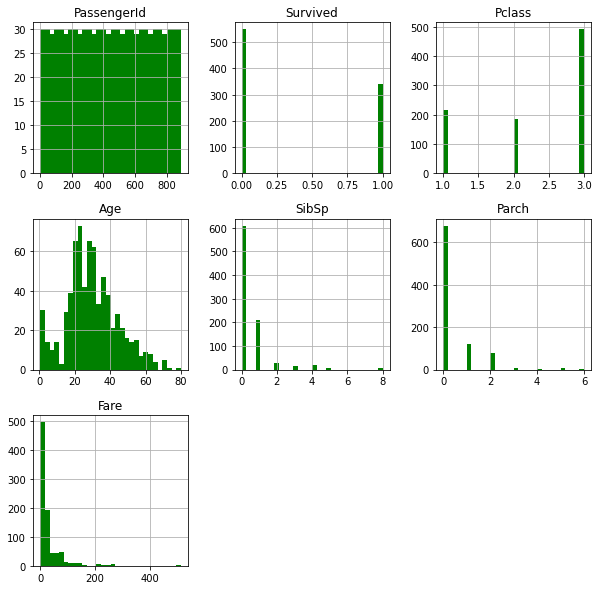

In [21]:
trainDataCopy.hist(bins=30,figsize=(10,10),color='g')
# As per histogram  we find that most of the feature data varies and is not having common traits in it
# Fare, Parch, Age and SibSp are tail heavy -> outliers exists
# We can drop Passengerid


In [22]:
trainDataCopy['CabinBool'] = trainDataCopy['Cabin']
testDataCopy['CabinBool'] = testDataCopy['Cabin']
passengerSurvived['CabinBool'] = passengerSurvived['Cabin']
passengerDied['CabinBool'] = passengerDied['Cabin']
trainDataCopy['Cabin'].unique()
# Let's look into the unique variable we have in Cabin
# We can't do encoding for Cabin variable as its cardinality is really high, 
# Instead let's try something else by giving missing Cabin # a value 0 and all other as 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
trainDataCopy['CabinBool'].fillna(0,inplace=True)
trainDataCopy['CabinBool'] = trainDataCopy['CabinBool'].apply(lambda x: 0 if x == 0 else 1)

passengerSurvived['CabinBool'].fillna(0,inplace=True)
passengerSurvived['CabinBool'] = passengerSurvived['CabinBool'].apply(lambda x: 0 if x == 0 else 1)

passengerDied['CabinBool'].fillna(0,inplace=True)
passengerDied['CabinBool'] = passengerDied['CabinBool'].apply(lambda x: 0 if x == 0 else 1)

testDataCopy['CabinBool'].fillna(0,inplace=True)
testDataCopy['CabinBool'] = testDataCopy['CabinBool'].apply(lambda x: 0 if x == 0 else 1)

trainDataCopy['CabinBool'].unique()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

array([0, 1])

<AxesSubplot:xlabel='Pclass', ylabel='CabinBool'>

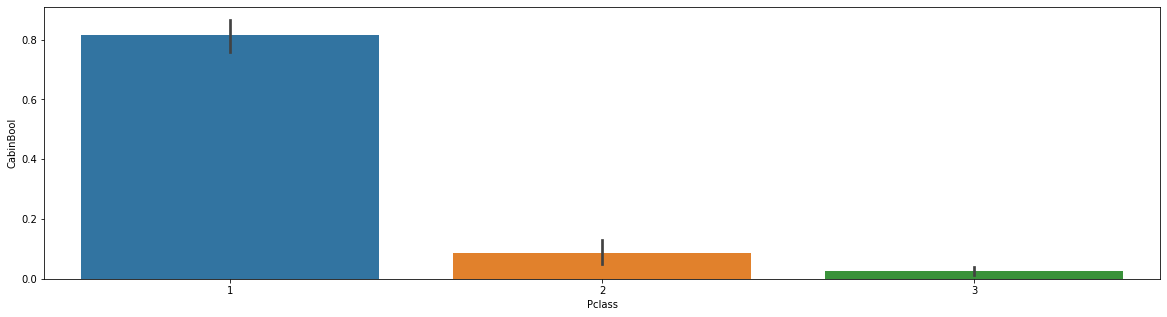

In [24]:
plt.figure(figsize=[20,5])
sns.barplot(y='CabinBool',x='Pclass',data=trainDataCopy) 
# Class 1 Passenger data contains maximum # of Cabin (value 1) 
# Clas 2 and 3 also contains some data for Cabin, which says Cabin # is not Pclass based feature
# (low correlation- to be checked in further steps)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

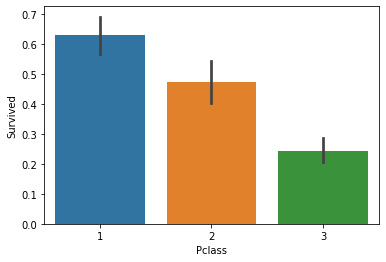

In [25]:
sns.barplot(y='Survived',x='Pclass',data=trainDataCopy)
# Class 1 Survives the most (value 1) then class 2 and least is class 3

<AxesSubplot:xlabel='CabinBool', ylabel='count'>

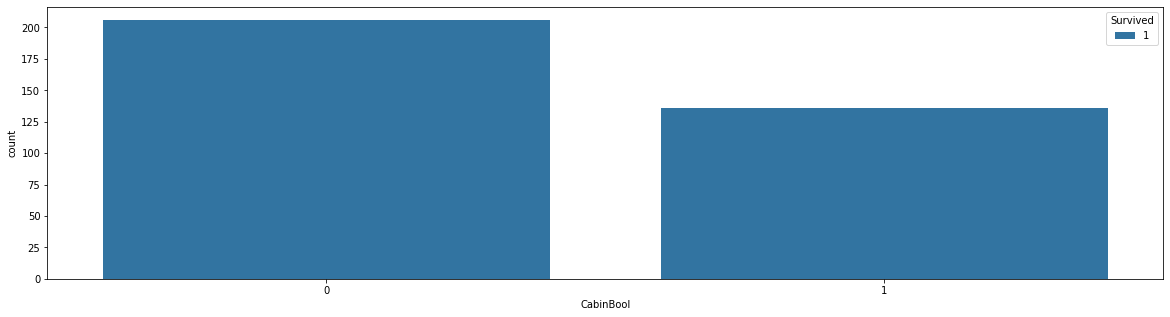

In [26]:
plt.figure(figsize=[20,5])
sns.countplot(x='CabinBool',hue='Survived',data=passengerSurvived)

Text(0.5, 0, 'Age')

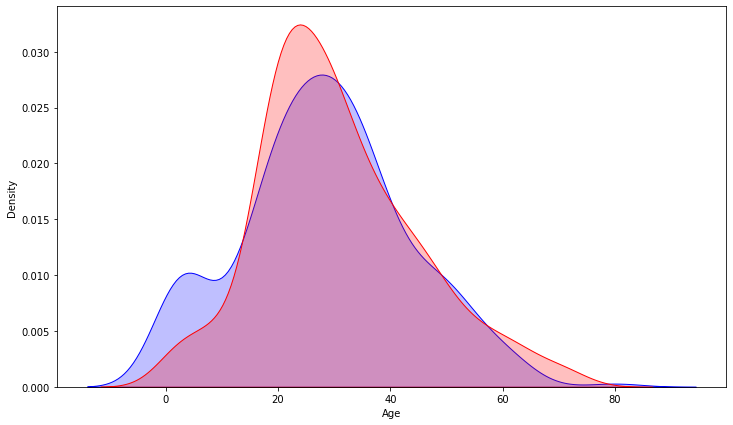

In [27]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable.

plt.figure(figsize=(12,7))

sns.kdeplot(passengerSurvived['Age'], label = 'Survived', shade = True, color = 'b')
sns.kdeplot(passengerDied['Age'], label = 'Died', shade = True, color = 'r')

plt.xlabel('Age')

Text(0.5, 0, 'Fare')

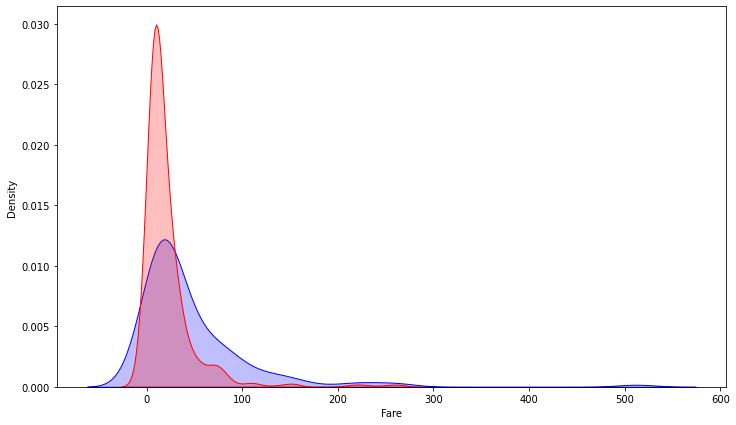

In [28]:
plt.figure(figsize=(12,7))

sns.kdeplot(passengerSurvived['Fare'], label = 'Survived', shade = True, color = 'b')
sns.kdeplot(passengerDied['Fare'], label = 'Died', shade = True, color = 'r')

plt.xlabel('Fare')

In [29]:
def iWantOnlyTitle(myName,title_list):
    
    index1=myName.find(', ')
    index2=myName.find('.')
    titleGuess = myName[index1+2:index2]
    if titleGuess not in title_list:
        title_list.append(titleGuess)
    return titleGuess

In [30]:
title_list=[]
trainDataCopy['Title']=trainDataCopy['Name'].map(lambda x: iWantOnlyTitle(x,title_list))
testDataCopy['Title']=testDataCopy['Name'].map(lambda x: iWantOnlyTitle(x,title_list))
trainDataCopy['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [31]:
testDataCopy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [32]:
# We need to combine some of the Titles together so that we have common bucket of unique titles for both sets of data 
# Replacing all titles with mr, mrs, miss, master -> Copied directly from the site and modified a bit
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir','Mr']:
        return 'Mr'
    elif title in ['the Countess', 'Mme','Mrs']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms','Miss']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    elif title in ['Dona','Lady']:
        return 'Lady'
    elif title in ['Master']:
        return 'Master'
    else:
        return 'OtherTitle'

In [33]:
trainDataCopy['Title']=trainDataCopy.apply(replace_titles, axis=1)
testDataCopy['Title']=testDataCopy.apply(replace_titles, axis=1)

In [34]:
trainDataCopy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Lady'], dtype=object)

In [35]:
#uniqueTicketcount
trainDataCopy['Ticket'].unique().shape[0]
# We see a pattern in ticket feature -> some are only numerical,left are having some text and then numerical values
# Let's separate them out

681

In [36]:
def filterTicket(fullTicket):
    numerical = ['0','1','2','3','4','5','6','7','8','9']
    #print(fullTicket[0])
    if type(fullTicket)==str or fullTicket!='':        
        if fullTicket[0] in numerical:
            return '#'
        else:
            return fullTicket[0]
    else:
        return 'Blank'

In [37]:
trainDataCopy['filterTickets'] = trainDataCopy['Ticket'].apply(filterTicket) 
trainDataCopy['filterTickets'].unique()

array(['A', 'P', 'S', '#', 'C', 'W', 'F', 'L'], dtype=object)

In [38]:
testDataCopy['filterTickets'] = testDataCopy['Ticket'].apply(filterTicket) 
testDataCopy['filterTickets'].unique()

array(['#', 'A', 'W', 'S', 'P', 'C', 'F', 'L'], dtype=object)

In [39]:
def filterCabin(fullCabin):
    numerical = ['0','1','2','3','4','5','6','7','8','9']
    #print(fullTicket[0])
    
    if type(fullCabin)!=str:
        return 'Blank'
    else:
        if fullCabin[0] in numerical:
            return '#'
        else:
            return fullCabin[0]

In [40]:
trainDataCopy['filterCabin'] = trainDataCopy['Cabin'].apply(filterCabin) 
trainDataCopy['filterCabin'].unique()

array(['Blank', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [41]:
testDataCopy['filterCabin'] = testDataCopy['Cabin'].apply(filterCabin) 
testDataCopy['filterCabin'].unique()

array(['Blank', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [42]:
# First drop 
trainDataCopy['Sex'] = trainDataCopy['Sex'].apply(lambda x: 1 if x == 'male' else 0)
trainData_cleaned0= trainDataCopy.drop(['Ticket','PassengerId','filterCabin','Cabin','CabinBool'],axis=1)
trainData_cleaned1= trainDataCopy.drop(['Ticket','PassengerId','Age','Name','filterCabin','Cabin','CabinBool'],axis=1)

testDataCopy['Sex'] = testDataCopy['Sex'].apply(lambda x: 1 if x == 'male' else 0)
testData_cleaned0= testDataCopy.drop(['Ticket','PassengerId','filterCabin','Cabin','CabinBool'],axis=1)
testData_cleaned1= testDataCopy.drop(['Ticket','PassengerId','Age','Name','filterCabin','Cabin','CabinBool'],axis=1)

# Encoding - another way is to use onehotencoder from sklearn library preporcessing sub library
trainData_with_dummies1 = pd.get_dummies(trainData_cleaned1,drop_first=True)

testData_with_dummies1 = pd.get_dummies(testData_cleaned1,drop_first=True)

trainData_with_dummies1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,filterTickets_A,filterTickets_C,filterTickets_F,filterTickets_L,filterTickets_P,filterTickets_S,filterTickets_W
0,0,3,1,1,0,7.2500,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1,1,0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,3,0,0,0,7.9250,0,1,0,1,0,0,0,0,0,0,0,1,0
3,1,1,0,1,0,53.1000,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,3,1,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,0


In [43]:
testData_with_dummies1

,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,filterTickets_A,filterTickets_C,filterTickets_F,filterTickets_L,filterTickets_P,filterTickets_S,filterTickets_W
0,3,1,0,0,7.8292,1,0,0,0,1,0,0,0,0,0,0,0,0
1,3,0,1,0,7.0000,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,0,9.6875,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3,1,0,0,8.6625,0,1,0,0,1,0,0,0,0,0,0,0,0
4,3,0,1,1,12.2875,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,8.0500,0,1,0,0,1,0,1,0,0,0,0,0,0
414,1,0,0,0,108.9000,0,0,0,0,0,0,0,0,0,0,1,0,0
415,3,1,0,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,1,0
416,3,1,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,0


In [45]:
# As we found Cabin and Fare correlated - we can merge them later on or check and compare results without too
survivedTarget = trainData_with_dummies1['Survived']
x=trainData_with_dummies1.drop(['Survived'],axis=1)
x

,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,filterTickets_A,filterTickets_C,filterTickets_F,filterTickets_L,filterTickets_P,filterTickets_S,filterTickets_W
0,3,1,1,0,7.2500,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,0,0,0,7.9250,0,1,0,1,0,0,0,0,0,0,0,1,0
3,1,0,1,0,53.1000,0,1,0,0,0,1,0,0,0,0,0,0,0
4,3,1,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,0,1,0,0,1,0,0,0,0,0,0,0,0
887,1,0,0,0,30.0000,0,1,0,1,0,0,0,0,0,0,0,0,0
888,3,0,1,2,23.4500,0,1,0,1,0,0,0,0,0,0,0,0,1
889,1,1,0,0,30.0000,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x)
X_test_file = scaler.fit_transform(testData_with_dummies1)
Y_train = survivedTarget

In [47]:
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split( X_train, Y_train, test_size=0.33, random_state=42)

In [48]:
X_train_model.shape[0]

596

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_model,y_train_model)
y_pred_model = model.predict(X_test_model)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred_model, y_test_model)))

Accuracy 82.37288135593221 %


<AxesSubplot:>

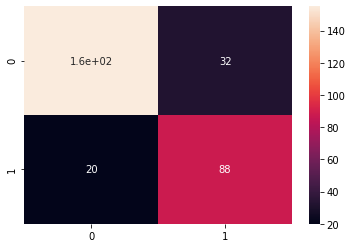

In [51]:
cm = confusion_matrix(y_pred_model, y_test_model)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_pred_model, y_test_model))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       187
           1       0.73      0.81      0.77       108

    accuracy                           0.82       295
   macro avg       0.81      0.82      0.81       295
weighted avg       0.83      0.82      0.83       295



In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_model, y_train_model)

RandomForestClassifier()

In [54]:
RandomForestClassifier()

RandomForestClassifier()

In [55]:
y_pred_RFM = model.predict(X_test_model)

<AxesSubplot:>

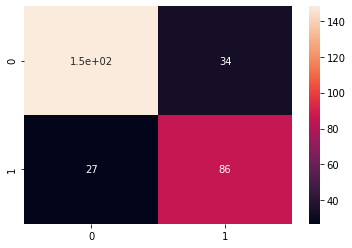

In [56]:
# Testing Set Performance
cm = confusion_matrix(y_pred_RFM, y_test_model)
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test_model, y_pred_RFM))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.76      0.72      0.74       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

